In [22]:
import pandas as pd

# vars
fileMetadata = {}
tableDataList = []
csv_number_list = []  
total_intracranial_list = []  # List to store total intracranial data
metadataCsvFile = 'synthseg_csv/synthseg_csv/FTHP_metadata.csv'

metadata_df = pd.read_csv(metadataCsvFile)
numRowsMetaData = len(metadata_df)

for rowNum in range(numRowsMetaData):
    csvFile = 'synthseg_csv/synthseg_csv/{}_synthseg_vol.csv'.format(rowNum)
    # Reading the CSV file into a DataFrame
    df = pd.read_csv(csvFile)

    # Check if 'total intracranial' column has any non-null value
    if df['total intracranial'].isnull().all():
        print(f"Skipping file {csvFile} as it contains no value in the 'total intracranial' column.")
        continue

    # Extracting the 'total intracranial' column value
    total_intracranial_value = df['total intracranial'].values[0]
    total_intracranial_list.append(total_intracranial_value)
    csv_number_list.append(rowNum)

    #print(f"Total intracranial value from file {csvFile}: {total_intracranial_value}")

total_intracranial_df = pd.DataFrame(total_intracranial_list, columns=['Total Intracranial'])
print("\nDataFrame with Total Intracranial data:")
print(total_intracranial_df)


Skipping file synthseg_csv/synthseg_csv/434_synthseg_vol.csv as it contains no value in the 'total intracranial' column.
Skipping file synthseg_csv/synthseg_csv/478_synthseg_vol.csv as it contains no value in the 'total intracranial' column.

DataFrame with Total Intracranial data:
     Total Intracranial
0             1673941.2
1             1666990.8
2             1687979.9
3             1655636.5
4             1698534.0
..                  ...
550           1678361.2
551           1734842.0
552           1700473.0
553           1667088.5
554           1722321.8

[555 rows x 1 columns]


In [41]:
import pandas as pd

# vars
metadataCsvFile = 'synthseg_csv/synthseg_csv/FTHP_metadata.csv'
metadata_df = pd.read_csv(metadataCsvFile)
tableDataList = []

# Iterate over the metadata rows
for index, row in metadata_df.iterrows():
    scanId = row['scanID']
    manufacturer = row['manufacturer']
    model = row['model']

    csvFile = 'synthseg_csv/synthseg_csv/{}_synthseg_vol.csv'.format(scanId)
    
    # Check if the file exists
    try:
        # Reading the CSV file into a DataFrame
        df = pd.read_csv(csvFile)

        # Check if 'total intracranial' column has any non-null value
        if df['total intracranial'].isnull().all():
            print(f"Skipping file {csvFile} as it contains no value in the 'total intracranial' column.")
            continue

        # Extracting the 'total intracranial' column value
        total_intracranial_value = df['total intracranial'].values[0]
    
        tableDataList.append({
            'Scan ID': scanId,
            'Total Intracranial': total_intracranial_value,
            'Manufacturer': manufacturer,
            'Model': model
        })

    except FileNotFoundError:
        print(f"File {csvFile} not found.")
        continue

final_table_df = pd.DataFrame(tableDataList)
print("\nDataFrame with Total Intracranial data, Manufacturer, and Model:")
print(final_table_df)


Skipping file synthseg_csv/synthseg_csv/434_synthseg_vol.csv as it contains no value in the 'total intracranial' column.
Skipping file synthseg_csv/synthseg_csv/478_synthseg_vol.csv as it contains no value in the 'total intracranial' column.

DataFrame with Total Intracranial data, Manufacturer, and Model:
     Scan ID  Total Intracranial             Manufacturer       Model
0          0           1673941.2  Philips Medical Systems      Intera
1          1           1666990.8                  SIEMENS        Aera
2          2           1687979.9                  SIEMENS      Avanto
3          3           1655636.5  Philips Medical Systems     Achieva
4          4           1698534.0                  SIEMENS        Aera
..       ...                 ...                      ...         ...
550      552           1678361.2                  Philips  Prodiva CX
551      553           1734842.0                  SIEMENS      Espree
552      554           1700473.0                  SIEMENS     

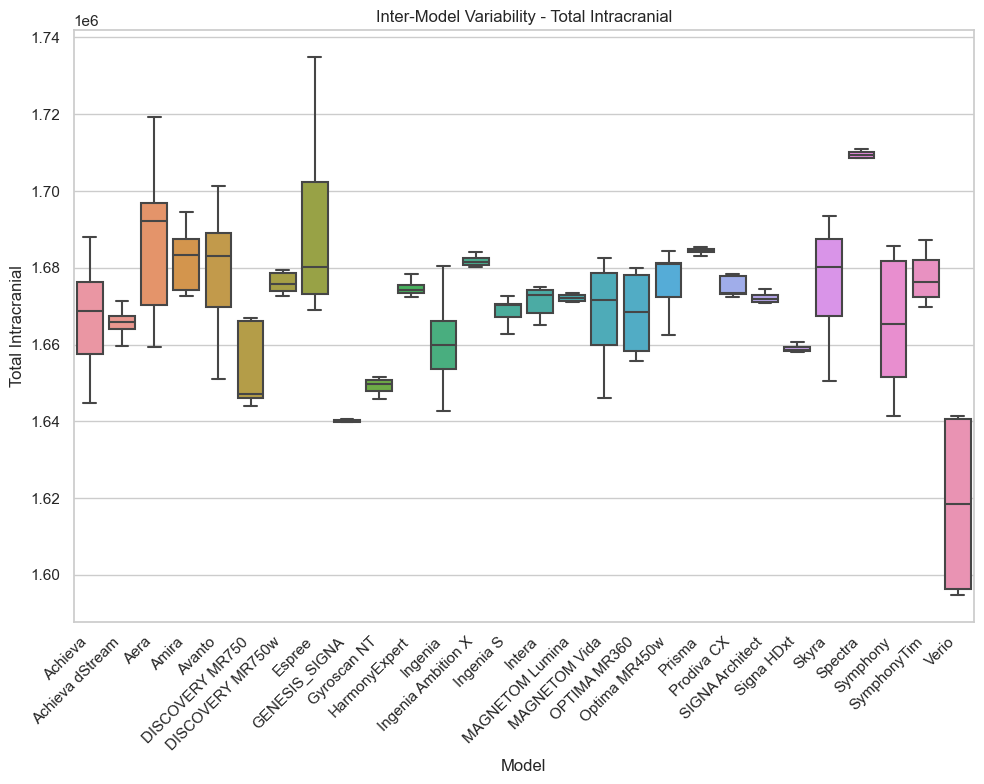

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of models (unique values in the 'Model' column)
#models = concatenated_df['Model'].unique()
final_table_df['Total Intracranial'] = pd.to_numeric(final_table_df['Total Intracranial'], errors='coerce')
final_table_df = final_table_df.dropna(subset=['Total Intracranial'])

final_table_df['Model'] = final_table_df['Model'].astype('category')


plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')


sns.boxplot(x='Model', y='Total Intracranial', data=final_table_df, sym='')

plt.title('Inter-Model Variability - Total Intracranial')
plt.xlabel('Model')
plt.ylabel('Total Intracranial')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()